In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing and modelling
# evaluate bagging ensemble for regression
# ------------------------------------------------------------------------------
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import accuracy_score





# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [2]:
# Data Loading


#training data
data_train = pd.read_csv('https://raw.githubusercontent.com/SantiagoArenas/MachineLearning/main/austinHousingData.csv')
data_train.head()
filtered_data_train = data_train[data_train['latestPrice'] < 2000000].copy()



In [3]:
filtered_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14980 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        14980 non-null  int64  
 1   city                        14980 non-null  object 
 2   streetAddress               14980 non-null  object 
 3   zipcode                     14980 non-null  int64  
 4   description                 14980 non-null  object 
 5   latitude                    14980 non-null  float64
 6   longitude                   14980 non-null  float64
 7   propertyTaxRate             14980 non-null  float64
 8   garageSpaces                14980 non-null  int64  
 9   hasAssociation              14980 non-null  bool   
 10  hasCooling                  14980 non-null  bool   
 11  hasGarage                   14980 non-null  bool   
 12  hasHeating                  14980 non-null  bool   
 13  hasSpa                      149

In [4]:
# Columnas descartables de inicio
filtered_data_train = filtered_data_train.drop(["description","homeImage","zpid","streetAddress","latest_saledate","latestPriceSource", 'garageSpaces'], axis=1)
#Cogemos los datos que queremos
filtered_data_train = filtered_data_train[filtered_data_train['city'] == 'austin']
filtered_data_train = filtered_data_train[filtered_data_train['homeType'] == 'Single Family']
#Tiene los mismos valores siempre, entonces no aporta nada
filtered_data_train = filtered_data_train.drop(["city","homeType"], axis=1)
numeric_cols = filtered_data_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = filtered_data_train.select_dtypes(include=['object', 'category', 'bool']).columns.to_list()
#Prefijos para las dummies
new_column_names = [
    'Dmy_association',
    'Dmy_cooling',
    'Dmy_garage',
    'Dmy_heating',
    'Dmy_spa',
    'Dmy_view'
]
data=pd.get_dummies(filtered_data_train, columns=cat_cols, prefix=new_column_names,drop_first=True, dtype= 'int64' ) 
print(data.dtypes)

zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSchools                int64
avgSchoolDistance             float64
avgSchoolRat

In [5]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        filtered_data_train.drop(columns = "latestPrice"),
                                        filtered_data_train['latestPrice'],
                                        random_state = 123,
                                        test_size=0.2
                                    )


In [6]:
# Instantiate a random forest regressor object
rf = RandomForestRegressor(random_state=123)

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [7]:
# Instantiate a random forest regressor object
rf = RandomForestRegressor(random_state=123)

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}

In [8]:
# Perform nested cross-validation with grid search
outer_cv = KFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=123)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=inner_cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X=X_train, y=y_train) # Fit the GridSearchCV object on training data

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [9]:
# Extract the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final random forest regressor using the best hyperparameters
rf_best = RandomForestRegressor(random_state=123, **best_params)
rf_best.fit(X=X_train, y=y_train)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(max_depth=15, n_estimators=300, random_state=123)

In [10]:
# Defining number of features to use based on Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Values to test for number of features
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features. It is obtained training error
# and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestRegressor(
                n_estimators = 300,
                criterion    = 'friedman_mse',
                max_depth    = 15,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123, 
                min_samples_split=2
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolution of out-of-bag-error vs number of predictors")
plt.legend();
print(f"Optimum value of max_features: {max_features_range[np.argmax(oob_scores)]}")

KeyboardInterrupt: 

Optimum value of minimum number of observations in leaves : 1


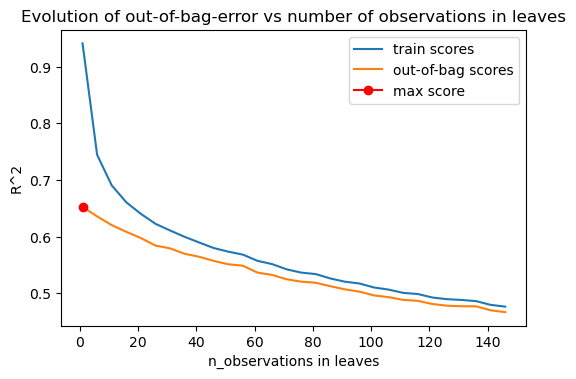

In [ ]:
# Fitting the minimum number of observations in the leeaves of the trees using Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
obser_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for observ in obser_range:
    model1 = RandomForestRegressor(
                n_estimators = 300,
                criterion    = 'friedman_mse',
                max_depth    = 15,
                max_features = 5,
                min_samples_leaf = observ,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123, 
                min_samples_split=2
             )
    model1.fit(X_train, y_train)
    train_scores.append(model1.score(X_train, y_train))
    oob_scores.append(model1.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(obser_range, train_scores, label="train scores")
ax.plot(obser_range, oob_scores, label="out-of-bag scores")
ax.plot(obser_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_observations in leaves")
ax.set_title("Evolution of out-of-bag-error vs number of observations in leaves")
plt.legend();
print(f"Optimum value of minimum number of observations in leaves : {obser_range[np.argmax(oob_scores)]}")

Optimum value of predictors using cv: 1


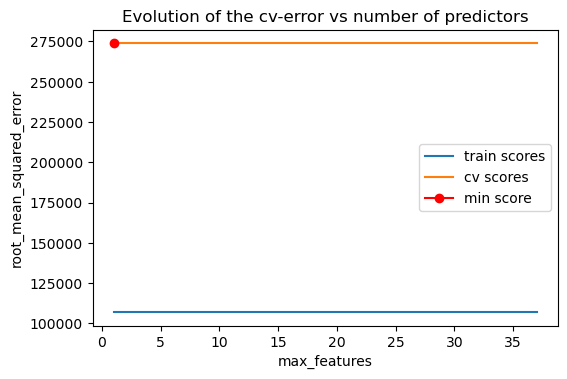

In [ ]:
# Validation of number of predictors using k-cross-validation and neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features
# Training error and k-cross-validation error are obtained.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 300,
                criterion    = 'friedman_mse',
                max_depth    = 15,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123, 
                min_samples_split=2
             )
    
    # Train error
    model.fit(X_train, y_train)
    predictions = model.predict(X = X_train)
    latestPrice = mean_squared_error(
            y_true  = y_train,
            y_pred  = predictions,
            squared = False
           )
    train_scores.append(latestPrice)
    
    # kcross-validation error
    scores = cross_val_score(
                estimator = model,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # adding scores of cross_val_score() and sign change
    cv_scores.append(-1*scores.mean())
    
# Graphic with the evolution of the errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolution of the cv-error vs number of predictors")
plt.legend();
print(f"Optimum value of predictors using cv: {max_features_range[np.argmin(cv_scores)]}")

In [11]:
# Final  Model built
# ==============================================================================
rf_final = RandomForestRegressor(
            n_estimators = 300,  
            criterion    = 'friedman_mse',
            max_depth    = 15,
            max_features = 1,
            oob_score    = True,
            min_samples_leaf=1,
            n_jobs       = -1,
            random_state = 123, 
            min_samples_split=2
         )

# Entrenamiento del modelo
# ==============================================================================
rf_final.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=15, max_features=1,
                      n_estimators=300, n_jobs=-1, oob_score=True,
                      random_state=123)

In [32]:


# randomforest ensemble for making predictions for regression

# Model training error
#-------------------------------------------------------------------------------
prediction_train = rf_final.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


latestPrice = mean_squared_error(
        y_true  = y_train,
        y_pred  = prediction_train,
        squared = False
       )
print(f"RMSE in train: {latestPrice}")

R2 Value in training: 0.84
Accuracy in training 77.55
RMSE in train: 334.71787310033886


In [13]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = rf_final.predict(X = X_test)

print('R2 Value in test:', round(metrics.r2_score(y_test, prediction_test),2))

#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

latestPrice = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction_test,
        squared = False
       )
print(f"MSE in test: {latestPrice}")

R2 Value in test: 0.68
Accuracy in test 64.9
MSE in test: 157035.2742362357


In [14]:
importance_predictors = pd.DataFrame(
                            {'predictor': filtered_data_train.drop(columns = "latestPrice").columns,
                             'importance': rf_final.feature_importances_}
                            )
print("Importance of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance of the model predictors
-------------------------------------------


,predictor,importance
25,livingAreaSqFt,0.111412
34,numOfBathrooms,0.093949
0,zipcode,0.070992
24,lotSizeSqFt,0.065319
31,avgSchoolRating,0.059921
1,latitude,0.059704
2,longitude,0.053574
32,avgSchoolSize,0.050692
33,MedianStudentsPerTeacher,0.047044
11,yearBuilt,0.042930


In [15]:
from sklearn.inspection import permutation_importance

importance_per = permutation_importance(
                estimator    = rf_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                #scoring      = 'neg_root_mean_squared_error',
                scoring     = 'r2',
                n_jobs       = - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importance = pd.DataFrame(
                    {k: importance_per[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importance['feature'] = X_train.columns
df_importance.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
25,0.111524,0.001238,livingAreaSqFt
34,0.089526,0.001143,numOfBathrooms
0,0.083118,0.001316,zipcode
1,0.065988,0.001814,latitude
31,0.060332,0.000737,avgSchoolRating
24,0.059322,0.000970,lotSizeSqFt
33,0.058476,0.001338,MedianStudentsPerTeacher
32,0.055612,0.001207,avgSchoolSize
2,0.049112,0.000511,longitude
4,0.041916,0.001854,hasAssociation


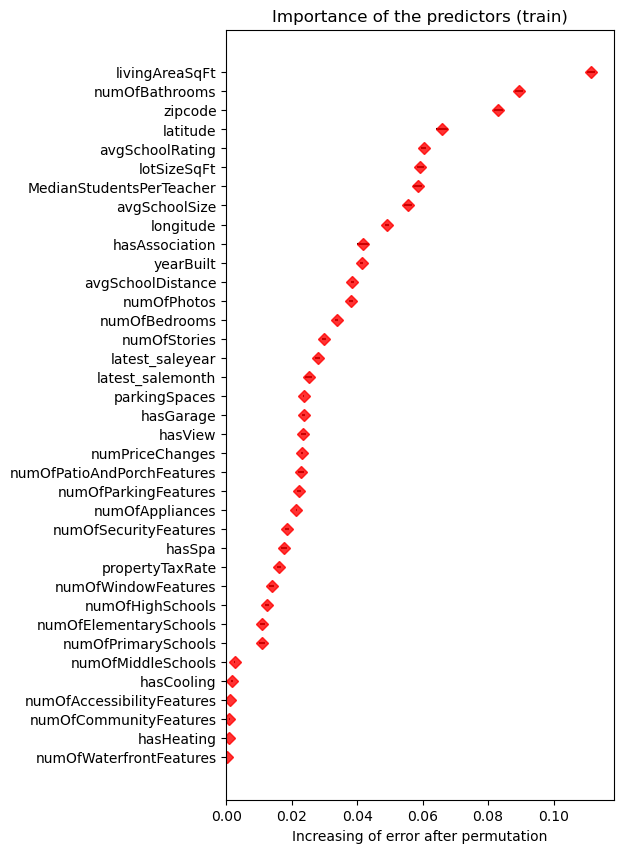

In [16]:
# Graphic
fig, ax = plt.subplots(figsize=(5, 10))
df_importance = df_importance.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importance['feature'],
    df_importance['importances_mean'],
    xerr=df_importance['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importance['importances_mean'],
    df_importance['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importance of the predictors (train)')
ax.set_xlabel('Increasing of error after permutation');

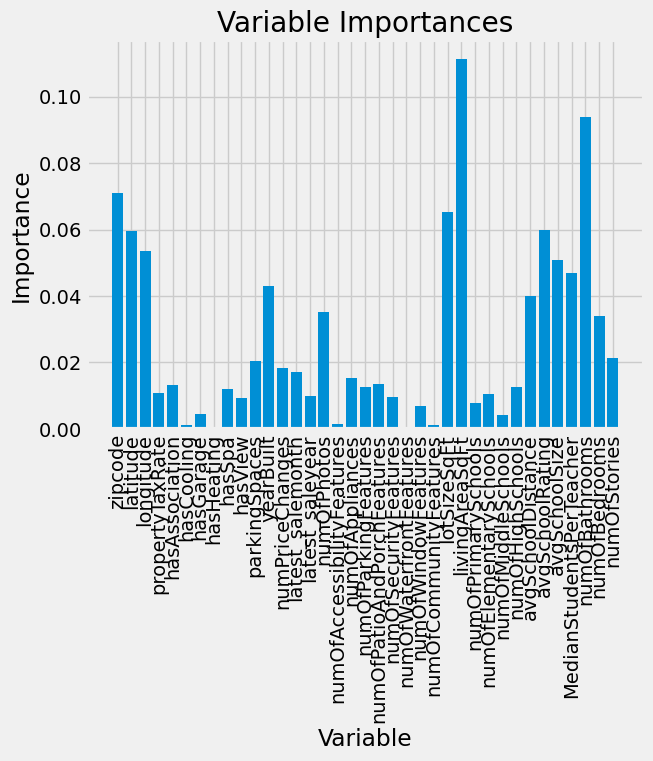

In [17]:
importances= rf_final.feature_importances_
feature_list = filtered_data_train.drop(columns = "latestPrice").columns

%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

no display found. Using non-interactive Agg backend


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.224977 to fit


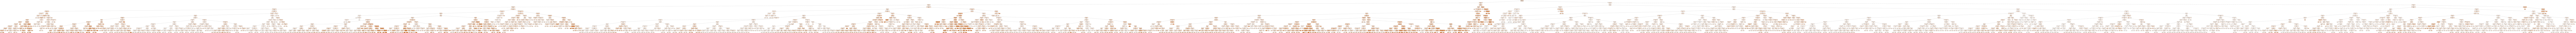

In [18]:
# Selecting any tree in the forest (Example 51)

from dmba import plotDecisionTree

plotDecisionTree(rf_final.estimators_[50], feature_names=list(filtered_data_train.drop(columns = "latestPrice").columns)) 
    



In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice values")
ax.set_title('Train evaluation ($ Millions)', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.savefig('train_error_plot.png')
#plt.show()

In [29]:
#######  TRAIN

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("latestPrice real", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice predicted")
ax.set_title(' Train error observed between real and predicted values ($ Millions)', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.savefig('train_ladder_plot.png')
#plt.show()

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice values")
ax.set_title('Test evaluation ($ Millions)', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.savefig('test_error_plot.png')
plt.show()

In [31]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("latestPrice real", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice predicted")
ax.set_title(' Test error observed between real and predicted values ($ Millions)', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.savefig('test_error_ladder.png')
plt.show()